In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import pandas as pd

# use LaTeX fonts in the plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

**Note.** \
Test_0 shows the computation costs for each operations of additive homomorphic encryption schemes (ElGamal vs Paillier). This used singlethread.\
Test_1 and Test_2 results are from the tests with **optimization** and **multi-threading**.\
Test_3 compares the results of ES-SPH-PSM and FES-SPH-PSM **with and without optimization**.\
Test_4 compares the results of SPH-PSM and S-SPH-PSM (with **multithreading**) to compute the cost for adding security.\
Test_5 shows the result of Test_2 with **single-threading** and **optimization**.

## Test_0: ElGamal vs Paillier
This test compares each operation cost of two additive homomorphic encryption schemes, **ElGamal** and **Paillier** . \
The result shows that ElGamal is always more efficient than Paillier.\ 
Note that the test result below is the average time of 10 test results.
(To test, go to directory ```exercise``` and run ```go test opTimeCheck_test.go -v```)

In [2]:
MICRO_TO_MILLI_SECONDS_DIVIDE_BY = 1000

def convert_micro_to_milli_seconds(arr):
    return np.divide(arr, MICRO_TO_MILLI_SECONDS_DIVIDE_BY)

In [3]:
ElGamal = convert_micro_to_milli_seconds([27402.6,29621,21.8,25321.5,60.5])

In [4]:
Paillier  = convert_micro_to_milli_seconds([33634,39909.7,27.4,66553.4,9382.5])

In [5]:
Enc = [ElGamal[0], Paillier[0]]
EncInv = [ElGamal[1], Paillier[1]]
MultCiphers = [ElGamal[2], Paillier[2]]
MultConstant = [ElGamal[3], Paillier[3]]
IsZero = [ElGamal[4], Paillier[4]]

In [6]:
x = ["Enc", "EncInv", "MultCiphers", "MultConstant", "IsZero"]

In [7]:
y = ["ElGamal", "Paillier"]

              ElGamal  Paillier
Enc           27.4026   33.6340
EncInv        29.6210   39.9097
MultCiphers    0.0218    0.0274
MultConstant  25.3215   66.5534
IsZero         0.0605    9.3825


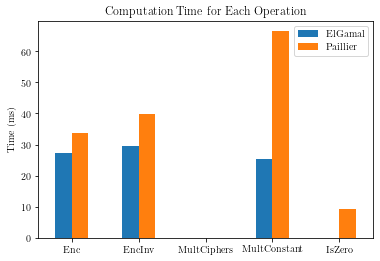

In [8]:
df = pd.DataFrame({y[0]:ElGamal, y[1]:Paillier}, x)

print(df)

df.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Computation Time for Each Operation')
#plt.xlabel('Operations')
plt.ylabel('Time (ms)')

plt.savefig('fig/eval_crypto.pdf')

## Test_1: Fix n:=num(wholeGenes) and Increase m:=num(markers)
This test shows the computation result of each protocol with fixing n and increasing m.\
This is done with multithreading and optimization (for ES-SPH-PSM and FES-SPH-PSM), \
on $n=10^4, 10^5$, and $10^6$, by increasing the ratio n:m from 10:1 to 10:10.

**n=10000**

In [9]:
#P1: SPH-PSM, P2: S-SPH-PSM, P3: ES-SPH-PSM (optimized), P4: FES-SPH-PSM (optimized)
numOfMarkers = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
parties = ["SL-Offline", "Alice-Offline", "Tester-Offline", "Alice-Online-pre", "Tester-Online", "Alice-Online-post"]
schemes = ["SPH-PSM", "S-SPH-PSM", "ES-SPH-PSM", "FES-SPH-PSM"]

In [10]:
P1 = [[0,6284751,19763,0,35854,67], [0,5993250,613404,0,40729,47], [0,6163460,1264418,0,44094,48], [0,6118510,1905222,0,45174,56], [0,6216905,2452298,0,46151,48], [0,6294212,3036848,0,48944,47], [0,6191845,3722066,0,52261,49], [0,6270611,4236469,0,54972,48], [0,6101240,4838558,0,270253,55], [0,6313989,5431656,0,330052,68]]
P2 = [[6364652,0,21271,0,37284,87],[6048545,0,786429,0,53620,63],[6195136,0,1251402,0,51390,46],[6127303,0,1892375,0,58925,48],[6165497,0,2461026,0,65952,47],[6184244,0,3055915,0,73164,74],[6158554,0,3667104,0,78408,48],[6141076,0,4334347,0,86360,52],[6191111,0,4823988,0,337509,64],[6123232,0,5455424,0,364591,65]]
P3 = [[54626,1262,23953,0,525553,393],[48783,781,23075,0,337468,265],[52497,978,37485,0,318301,388],[61022,1277,37309,0,281524,135],[46077,1047,22512,0,249674,71],[59040,1107,37444,0,204971,122],[45761,1174,37659,0,186083,283],[59825,1133,37858,0,145273,232],[61074,1200,33240,0,98259,277],[51847,1009,31862,0,75758,87]]
P4 = [[58627,1227,27118,479252,251345,47],[45096,774,23077,445458,275929,99],[58641,1369,36422,462623,304577,199],[58496,1487,37509,689458,342128,113],[47549,884,24715,468878,341132,367],[83123,1443,43867,876549,291398,95],[45580,1060,37895,590202,576599,181],[58958,969,32227,468088,456805,360],[60815,1488,40021,887605,342181,256],[58404,1163,24459,459730,285773,181]]
print(len(P1), len(P1[0]), len(P2), len(P2[0]), len(P3), len(P3[0]), len(P4), len(P4[0]))

10 6 10 6 10 6 10 6


In [11]:
def DivideOfflineOnline(protocol):
    n = len(protocol)
    offline = [0]*n
    online = [0]*n
    
    for i in range(n):
        for j in range(3):
            offline[i] += protocol[i][j]
        for j in range(3,6):
            online[i] += protocol[i][j]
    return offline, online

In [12]:
P1_Offline, P1_Online = DivideOfflineOnline(P1)
P2_Offline, P2_Online = DivideOfflineOnline(P2)
P3_Offline, P3_Online = DivideOfflineOnline(P3)
P4_Offline, P4_Online = DivideOfflineOnline(P4)

In [13]:
3e+9/1e+5

30000.0

In [14]:
def MICROSECOND_ARRAY_TO_HOURS(arr):
    return np.divide(arr, 3.6e+9)

def MICROSECOND_ARRAY_TO_MINUTES(arr):
    return np.divide(arr, 6e+7)

def MICROSECOND_ARRAY_TO_SECONDS(arr):
    return np.divide(arr, 1e+6)

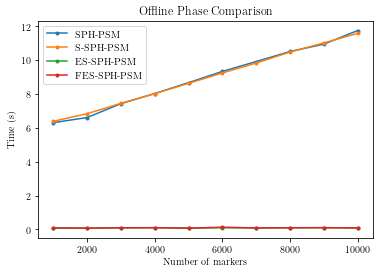

In [15]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_SECONDS(P1_Offline), schemes[1]:MICROSECOND_ARRAY_TO_SECONDS(P2_Offline), schemes[2]:MICROSECOND_ARRAY_TO_SECONDS(P3_Offline), schemes[3]:MICROSECOND_ARRAY_TO_SECONDS(P4_Offline)},numOfMarkers)

df.plot(style='.-')
plt.title('Offline Phase Comparison')
plt.xlabel('Number of markers')
plt.ylabel('Time (s)')
plt.savefig('fig/eval_offline_10000.pdf')

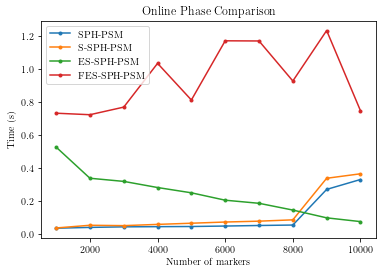

In [16]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_SECONDS(P1_Online), schemes[1]:MICROSECOND_ARRAY_TO_SECONDS(P2_Online), schemes[2]:MICROSECOND_ARRAY_TO_SECONDS(P3_Online), schemes[3]:MICROSECOND_ARRAY_TO_SECONDS(P4_Online)},numOfMarkers)

df.plot(style='.-')
plt.title('Online Phase Comparison')
plt.xlabel('Number of markers')
plt.ylabel('Time (s)')
plt.savefig('fig/eval_online_10000.pdf')

**n=100000**

In [17]:
numOfMarkers = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

In [18]:
P1 = [[0,63259435,20970,0,35422,87], [0,61340849,6123407,0,65067,55], [0,60636961,12124343,0,84348,56], [0,60911421,18207535,0,182378,82], [0,60543962,24388667,0,232322,57], [0,60768351,30552538,0,229977,57], [0,61510762,36585032,0,261704,53], [0,60772027,42851048,0,402901,71], [0,61016346,48966146,0,557496,119], [0,60762099,55018785,0,326300,91]]
P2 = [[61719214,0,20515,0,36690,63],[60855497,0,6167096,0,111211,51],[61114155,0,12295577,0,215869,57],[61142320,0,18198298,0,311754,52],[60984067,0,24523155,0,368532,47],[62196858,0,30521518,0,518623,52],[61150511,0,36489329,0,659355,57],[61470029,0,42762963,0,689912,73],[60818034,0,48700695,0,783979,48],[61936586,0,55458431,0,821382,50]]
P3 = [[106569,2577,22648,0,3682935,2083],[107451,2924,38106,0,3416481,1977],[101180,2596,38437,0,3094469,3423],[106671,2520,38705,0,2839464,6269],[121615,2690,39718,0,2291031,1456],[102586,2313,40039,0,1889331,361],[108773,2624,57607,0,1740462,49],[113866,2533,58644,0,1451551,6259],[104022,2736,76266,0,793354,1749],[107526,2386,87533,0,660164,1462]]
P4 = [[107842,2511,19331,722753,250652,50],[104859,2489,44055,775734,337341,974],[124392,3037,38530,654791,297127,758],[127114,2385,39141,722295,328953,996],[110755,2484,39259,733384,295541,898],[98220,2617,41574,457246,322592,395],[113479,2543,40142,692644,386772,546],[131433,2462,56402,722223,309768,2137],[131409,2693,71636,675366,383256,1075],[101643,2557,67586,800457,498362,587]]
print(len(P1), len(P1[0]), len(P2), len(P2[0]), len(P3), len(P3[0]), len(P4), len(P4[0]))

10 6 10 6 10 6 10 6


In [19]:
P1_Offline, P1_Online = DivideOfflineOnline(P1)
P2_Offline, P2_Online = DivideOfflineOnline(P2)
P3_Offline, P3_Online = DivideOfflineOnline(P3)
P4_Offline, P4_Online = DivideOfflineOnline(P4)

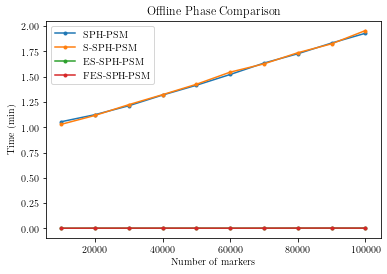

In [20]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_MINUTES(P1_Offline), schemes[1]:MICROSECOND_ARRAY_TO_MINUTES(P2_Offline), schemes[2]:MICROSECOND_ARRAY_TO_MINUTES(P3_Offline), schemes[3]:MICROSECOND_ARRAY_TO_MINUTES(P4_Offline)},numOfMarkers)

df.plot(style='.-')
plt.title('Offline Phase Comparison')
plt.xlabel('Number of markers')
plt.ylabel('Time (min)')
plt.savefig('fig/eval_offline_100000.pdf')

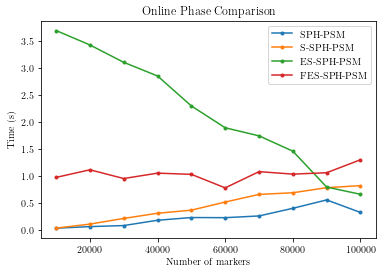

In [21]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_SECONDS(P1_Online), schemes[1]:MICROSECOND_ARRAY_TO_SECONDS(P2_Online), schemes[2]:MICROSECOND_ARRAY_TO_SECONDS(P3_Online), schemes[3]:MICROSECOND_ARRAY_TO_SECONDS(P4_Online)},numOfMarkers)

df.plot(style='.-')
plt.title('Online Phase Comparison')
plt.xlabel('Number of markers')
plt.ylabel('Time (s)')
plt.savefig('fig/eval_online_100000.pdf')

**n=1000000**

In [22]:
numOfMarkers = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

In [23]:
P1 = [[0,620927410,20812,0,36020,65],[0,604714075,60522997,0,285339,49],[0,603984307,121503605,0,962306,61],[0,604837700,182862728,0,3018489,56],[0,605479544,242543133,0,2401280,59],[0,611046705,305049152,0,1903505,51],[0,603432370,364020820,0,4972005,73],[0,605443032,425721884,0,2567507,48],[0,606146397,487250014,0,2500319,50],[0,610544774,548231942,0,5342081,91]]
P2 = [[609327050,0,21208,0,36684,62],[605992206,0,60709625,0,740198,56],[605278935,0,121722563,0,1959618,63],[613523099,0,182511426,0,2844358,55],[609739678,0,242472322,0,3881498,68],[604519512,0,304820436,0,4609335,53],[608104210,0,366798021,0,7558315,58],[614423783,0,425195568,0,6382205,59],[606980374,0,483161223,0,8563870,53],[607511706,0,548009491,0,8037663,74]]
P3 = [[688301,14181,19490,0,37055737,14125],[676233,15297,77470,0,34592133,16764],[706097,14817,137861,0,30484610,34682],[687681,14657,214549,0,26990856,10467],[732127,14505,258847,0,22841175,52295],[666686,14304,311465,0,19605257,3839],[665061,14776,391527,0,16212649,65961],[672531,14297,464304,0,12630849,40923],[717115,14394,507382,0,8114547,4199],[749647,14423,561809,0,4153970,25810]]
P4 = [[661647,15695,19822,448771,253148,51],[802709,14431,81179,612854,401818,3739],[673686,14754,138226,525209,425981,5172],[682759,14487,202811,523988,574454,19305],[710429,15133,263798,597323,561901,348],[689735,14375,329957,499944,739083,16197],[688131,14283,375327,516254,910240,22693],[666641,14294,449353,468562,916684,17567],[675969,14644,520083,537624,969060,34653],[666543,14171,593991,465656,1018580,15007]]
print(len(P1), len(P1[0]), len(P2), len(P2[0]), len(P3), len(P3[0]), len(P4), len(P4[0]))

10 6 10 6 10 6 10 6


In [24]:
P1_Offline, P1_Online = DivideOfflineOnline(P1)
P2_Offline, P2_Online = DivideOfflineOnline(P2)
P3_Offline, P3_Online = DivideOfflineOnline(P3)
P4_Offline, P4_Online = DivideOfflineOnline(P4)

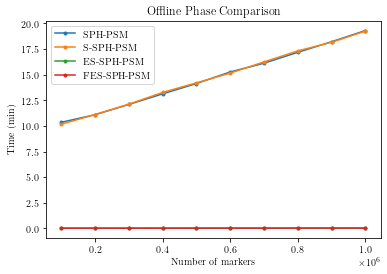

In [25]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_MINUTES(P1_Offline), schemes[1]:MICROSECOND_ARRAY_TO_MINUTES(P2_Offline), schemes[2]:MICROSECOND_ARRAY_TO_MINUTES(P3_Offline), schemes[3]:MICROSECOND_ARRAY_TO_MINUTES(P4_Offline)},numOfMarkers)

df.plot(style='.-')
plt.title('Offline Phase Comparison')
plt.xlabel('Number of markers')
plt.ylabel('Time (min)')
plt.savefig('fig/eval_offline_1000000.pdf')

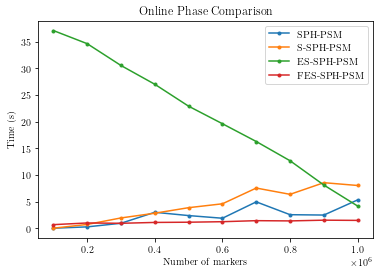

In [26]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_SECONDS(P1_Online), schemes[1]:MICROSECOND_ARRAY_TO_SECONDS(P2_Online), schemes[2]:MICROSECOND_ARRAY_TO_SECONDS(P3_Online), schemes[3]:MICROSECOND_ARRAY_TO_SECONDS(P4_Online)},numOfMarkers)

df.plot(style='.-')
plt.title('Online Phase Comparison')
plt.xlabel('Number of markers')
plt.ylabel('Time (s)')
plt.savefig('fig/eval_online_1000000.pdf')

Stacked computation cost for each protocol, with $n=10^6$

In [27]:
def DivideParties(protocol):
    n = len(protocol)
    sl_offline = [0]*n
    alice_offline = [0]*n
    tester_offline = [0]*n
    alice_online_pre = [0]*n
    tester_online = [0]*n
    alice_online_post = [0]*n
    
    for i in range(n):
        sl_offline[i] = protocol[i][0]
        alice_offline[i] = protocol[i][1]
        tester_offline[i] = protocol[i][2]
        alice_online_pre[i] = protocol[i][3]
        tester_online[i] = protocol[i][4]
        alice_online_post[i] = protocol[i][5]
    return sl_offline, alice_offline, tester_offline, alice_online_pre, tester_online, alice_online_post

In [28]:
P1_slOff, P1_aliceOff, P1_testerOff, P1_aliceOnPre, P1_testerOn, P1_aliceOnPost = DivideParties(P1)
P2_slOff, P2_aliceOff, P2_testerOff, P2_aliceOnPre, P2_testerOn, P2_aliceOnPost = DivideParties(P2)
P3_slOff, P3_aliceOff, P3_testerOff, P3_aliceOnPre, P3_testerOn, P3_aliceOnPost = DivideParties(P3)
P4_slOff, P4_aliceOff, P4_testerOff, P4_aliceOnPre, P4_testerOn, P4_aliceOnPost = DivideParties(P4)

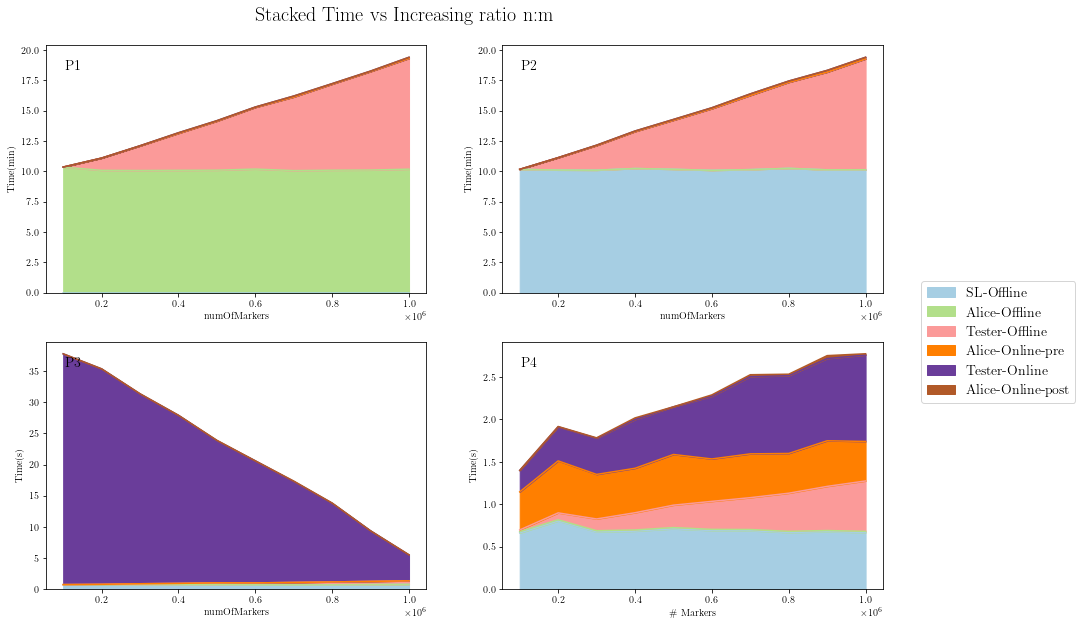

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
df1 = pd.DataFrame({parties[0]:MICROSECOND_ARRAY_TO_MINUTES(P1_slOff), parties[1]:MICROSECOND_ARRAY_TO_MINUTES(P1_aliceOff), parties[2]:MICROSECOND_ARRAY_TO_MINUTES(P1_testerOff), parties[3]:MICROSECOND_ARRAY_TO_MINUTES(P1_aliceOnPre), parties[4]:MICROSECOND_ARRAY_TO_MINUTES(P1_testerOn), parties[5]:MICROSECOND_ARRAY_TO_MINUTES(P1_aliceOnPost)}, numOfMarkers)
df2 = pd.DataFrame({parties[0]:MICROSECOND_ARRAY_TO_MINUTES(P2_slOff), parties[1]:MICROSECOND_ARRAY_TO_MINUTES(P2_aliceOff), parties[2]:MICROSECOND_ARRAY_TO_MINUTES(P2_testerOff), parties[3]:MICROSECOND_ARRAY_TO_MINUTES(P2_aliceOnPre), parties[4]:MICROSECOND_ARRAY_TO_MINUTES(P2_testerOn), parties[5]:MICROSECOND_ARRAY_TO_MINUTES(P2_aliceOnPost)}, numOfMarkers)
df3 = pd.DataFrame({parties[0]:MICROSECOND_ARRAY_TO_SECONDS(P3_slOff), parties[1]:MICROSECOND_ARRAY_TO_SECONDS(P3_aliceOff), parties[2]:MICROSECOND_ARRAY_TO_SECONDS(P3_testerOff), parties[3]:MICROSECOND_ARRAY_TO_SECONDS(P3_aliceOnPre), parties[4]:MICROSECOND_ARRAY_TO_SECONDS(P3_testerOn), parties[5]:MICROSECOND_ARRAY_TO_SECONDS(P3_aliceOnPost)}, numOfMarkers)
df4 = pd.DataFrame({parties[0]:MICROSECOND_ARRAY_TO_SECONDS(P4_slOff), parties[1]:MICROSECOND_ARRAY_TO_SECONDS(P4_aliceOff), parties[2]:MICROSECOND_ARRAY_TO_SECONDS(P4_testerOff), parties[3]:MICROSECOND_ARRAY_TO_SECONDS(P4_aliceOnPre), parties[4]:MICROSECOND_ARRAY_TO_SECONDS(P4_testerOn), parties[5]:MICROSECOND_ARRAY_TO_SECONDS(P4_aliceOnPost)}, numOfMarkers)

df1.plot.area(ax=axes[0,0], legend=False, colormap='Paired', xlabel='numOfMarkers', ylabel='Time(min)')
plt.annotate('P1', xy=(-1.15,2.1), xycoords='axes fraction', fontsize=14)
df2.plot.area(ax=axes[0,1], legend=False, colormap='Paired', xlabel='numOfMarkers', ylabel='Time(min)')
plt.annotate('P2', xy=(0.05,2.1), xycoords='axes fraction', fontsize=14)
df3.plot.area(ax=axes[1,0], legend=False, colormap='Paired', xlabel='numOfMarkers', ylabel='Time(s)')
plt.annotate('P3', xy=(-1.15,0.9), xycoords='axes fraction', fontsize=14)
df4.plot.area(ax=axes[1,1], colormap='Paired', xlabel='\# Markers', ylabel='Time(s)')
plt.annotate('P4', xy=(0.05,0.9), xycoords='axes fraction', fontsize=14)
plt.legend(bbox_to_anchor=(1.1, 1), loc='center left', borderaxespad=0, fontsize=14)
plt.annotate('Stacked Time vs Increasing ratio n:m', xy=(-0.65,2.3), xycoords='axes fraction', fontsize=20)
plt.savefig('fig/stacked_1000000_increasing_m.pdf')

## Test_2: Fix n:m ratio and Increase n from $10^4$ to $10^9$
This tests shows the computation results of each protocol with fixed n:m ratio (as 2:1) and increasing n.\
This is done with multithreading and optimization (for ES-SPH-PSM and FES-SPH-PSM)

In [30]:
numOfWholeGenes = [10000, 100000, 1000000, 10000000, 100000000, 1000000000]

In [31]:
P1 = [[0,6347016.00,3076068.00,0,49471.00,70.00],[0,61226754.00,30787737.00,0,162898.00,51.00], [0,605570184.00,305254468.00,0,3558041.00,65.00]]
P2 = [[6206417.00,0,3091795.00,0,71674.00,47.00],[61199327.00,0,30637103.00,0,893212.00,49.00], [610557591.00,0,303768645.00,0,4652035.00,64.00]]
P3 = [[44550.00,1437.00,24593.00,0,206128.00,168.00],[106450.00,2541.00,40152.00,0,1894134.00,466.00],[666060.00,14347.00,341938.00,0,19085419.00,15888.00],[6384635.00,150802.00,3041691.00,0,191194597.00,89296.00],[64664548.00,1532824.00,30795453.00,0,1907052409.00,3827265.00], [640421011.00,14404469.00,304058067.00,0,18112369700.00,7187555.00]]
P4 = [[58830.00,956.00,36976.00,576203.00,280007.00,223.00],[123153.00,2559.00,40167.00,613300.00,443992.00,900.00],[683529.00,14561.00,472705.00,560703.00,762396.00,18621.00],[6390805.00,139856.00,3131406.00,492209.00,3315375.00,63297.00],[64737889.00,1373007.00,30776621.00,615152.00,30597197.00,169406.00], [639151246.00,14262527.00,305969387.00,461794.00,293939686.00,2364371.00]]
print(len(P1), len(P1[0]), len(P2), len(P2[0]), len(P3), len(P3[0]), len(P4), len(P4[0]))

3 6 3 6 6 6 6 6


In [32]:
#approximate first two protocols for larger values
P1_approx = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
P2_approx = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]

P1_approx[0][0] = (P1[0][0]+P1[1][0]+P1[2][0])/3
P1_approx[1][0] = (P1[0][0]+P1[1][0]+P1[2][0])/3
P1_approx[2][0] = (P1[0][0]+P1[1][0]+P1[2][0])/3

P1_approx[0][1] = (P1[1][1]-P1[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1[0][1]
P1_approx[1][1] = (P1[1][1]-P1[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1[0][1]
P1_approx[2][1] = (P1[1][1]-P1[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1[0][1]

P1_approx[0][2] = (P1[1][2]-P1[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1[0][2]
P1_approx[1][2] = (P1[1][2]-P1[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1[0][2]
P1_approx[2][2] = (P1[1][2]-P1[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1[0][2]

P1_approx[0][3] = (P1[0][3]+P1[1][3]+P1[2][3])/3
P1_approx[1][3] = (P1[0][3]+P1[1][3]+P1[2][3])/3
P1_approx[2][3] = (P1[0][3]+P1[1][3]+P1[2][3])/3

P1_approx[0][4] = (P1[1][4]-P1[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1[0][4]
P1_approx[1][4] = (P1[1][4]-P1[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1[0][4]
P1_approx[2][4] = (P1[1][4]-P1[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1[0][4]

P1_approx[0][5] = (P1[0][5]+P1[1][5]+P1[2][5])/3
P1_approx[1][5] = (P1[0][5]+P1[1][5]+P1[2][5])/3
P1_approx[2][5] = (P1[0][5]+P1[1][5]+P1[2][5])/3

P2_approx[0][0] = (P2[1][0]-P2[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2[0][0]
P2_approx[1][0] = (P2[1][0]-P2[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2[0][0]
P2_approx[2][0] = (P2[1][0]-P2[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2[0][0]

P2_approx[0][1] = (P2[0][1]+P2[1][1]+P2[2][1])/3
P2_approx[1][1] = (P2[0][1]+P2[1][1]+P2[2][1])/3
P2_approx[2][1] = (P2[0][1]+P2[1][1]+P2[2][1])/3

P2_approx[0][2] = (P2[1][2]-P2[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2[0][2]
P2_approx[1][2] = (P2[1][2]-P2[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2[0][2]
P2_approx[2][2] = (P2[1][2]-P2[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2[0][2]

P2_approx[0][3] = (P2[0][3]+P2[1][3]+P2[2][3])/3
P2_approx[1][3] = (P2[0][3]+P2[1][3]+P2[2][3])/3
P2_approx[2][3] = (P2[0][3]+P2[1][3]+P2[2][3])/3

P2_approx[0][4] = (P2[1][4]-P2[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2[0][4]
P2_approx[1][4] = (P2[1][4]-P2[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2[0][4]
P2_approx[2][4] = (P2[1][4]-P2[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2[0][4]

P2_approx[0][5] = (P2[0][5]+P2[1][5]+P2[2][5])/3
P2_approx[1][5] = (P2[0][5]+P2[1][5]+P2[2][5])/3
P2_approx[2][5] = (P2[0][5]+P2[1][5]+P2[2][5])/3            

In [33]:
P1_Offline, P1_Online = DivideOfflineOnline(P1)
P1_approx_Offline, P1_approx_Online = DivideOfflineOnline(P1_approx)
P2_Offline, P2_Online = DivideOfflineOnline(P2)
P2_approx_Offline, P2_approx_Online = DivideOfflineOnline(P2_approx)
P3_Offline, P3_Online = DivideOfflineOnline(P3)
P4_Offline, P4_Online = DivideOfflineOnline(P4)

P1_Offline += P1_approx_Offline
P1_Online += P1_approx_Online
P2_Offline += P2_approx_Offline
P2_Online += P2_approx_Online

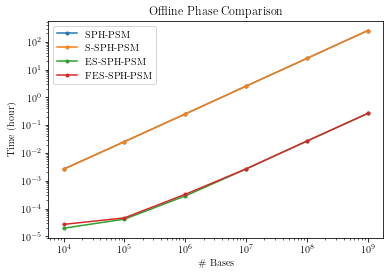

In [34]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_HOURS(P1_Offline), schemes[1]:MICROSECOND_ARRAY_TO_HOURS(P2_Offline), schemes[2]:MICROSECOND_ARRAY_TO_HOURS(P3_Offline), schemes[3]:MICROSECOND_ARRAY_TO_HOURS(P4_Offline)},numOfWholeGenes)

df.plot(loglog=True, style='.-')
plt.title('Offline Phase Comparison')
plt.xlabel('\# Bases')
plt.ylabel('Time (hour)')
plt.savefig('fig/test2_offline.pdf')

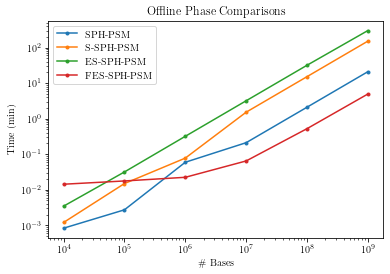

In [35]:
df = pd.DataFrame({schemes[0]:MICROSECOND_ARRAY_TO_MINUTES(P1_Online), schemes[1]:MICROSECOND_ARRAY_TO_MINUTES(P2_Online), schemes[2]:MICROSECOND_ARRAY_TO_MINUTES(P3_Online), schemes[3]:MICROSECOND_ARRAY_TO_MINUTES(P4_Online)},numOfWholeGenes)

df.plot(loglog=True, style='.-')
plt.title('Offline Phase Comparisons')
plt.xlabel('\# Bases')
plt.ylabel('Time (min)')
plt.savefig('fig/test2_online.pdf')

## Test_3: (P3, P4 Online only) optimized vs non-optimized performance
This test compares the computation cost with/without optimization in ES-SPH-PSM and FES-SPH-PSM.\
The test is on singlethreading, $n=10^8$, and $n:m=2:1$.

In [36]:
#n=10^8, n:m=2:1, with no optimization
p3_noop = [2003000798,43862535,971538446,0,82944511919,1292782]
p4_noop = [2003879225,43986091,964987707,467176,897455898,515372]
#n=10^8, n:m=2:1, with optimization
p3_op = [2003437836,42550739,972459029,0,2677770051,345346]
p4_op = [2003674110,43048830,968817195,461261,892499727,2340788]

sum_p3_noop = 0;sum_p3_op = 0;sum_p4_noop = 0;sum_p4_op = 0
for i in range(6):
    sum_p3_noop += p3_noop[i]
    sum_p3_op += p3_op[i]
    sum_p4_noop += p4_noop[i]
    sum_p4_op += p4_op[i]
print(sum_p3_noop, sum_p3_op, sum_p4_noop, sum_p4_op)

85964206480 5696563001 3911291469 3910841911


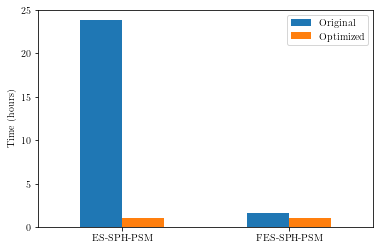

In [37]:
# n=10^8, n:m=2:1
name = ["Original", "Optimized"]
P3 = MICROSECOND_ARRAY_TO_HOURS([sum_p3_noop, sum_p3_op])
P4 = MICROSECOND_ARRAY_TO_HOURS([sum_p4_noop, sum_p4_op])
df = pd.DataFrame({name[0]:P3, name[1]:P4}, schemes[2:])
df.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Time (hours)')
plt.savefig('fig/eval_optimization.pdf')

## Test_4: Cost for Adding Security to SPH-PSM

This is comparing Alice's computation cost in **SPH-PSM** offline phase and SL's computation cost in **S-SPH-PSM** offline phase. \
The gap between two costs means *the cost for signing the ciphertexts*. 
Note that the test result below is the average time of 10 test results.
(To test, go to directory ```exercise``` and run ```go test checkSigCost_test.go -timeout 24h -v```)

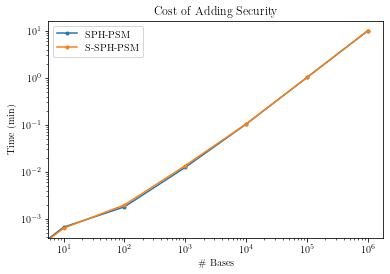

In [38]:
name = ["SPH-PSM", "S-SPH-PSM"]
numOfWholeGenes = [0, 10, 100, 1000, 10000, 100000, 1000000]
P1 = MICROSECOND_ARRAY_TO_MINUTES([0, 39802, 107713, 746494, 6216548, 61270262, 604997738])
P2 = MICROSECOND_ARRAY_TO_MINUTES([0, 37834, 118198, 812912, 6283927, 61195756, 609169463])

df = pd.DataFrame({name[0]:P1, name[1]:P2}, numOfWholeGenes)
df.plot(loglog=True, style='.-')
plt.title('Cost of Adding Security')
plt.xlabel('\# Bases')
plt.ylabel('Time (min)')
plt.savefig('fig/cost_of_security.pdf')

## Test_5: Fix n:m ratio and Increase n from $10^4$ to $10^9$ with Singlethreading
This tests shows the computation results of the Test_2 with single-threading.\
This is done with simglethreading and optimization (for ES-SPH-PSM and FES-SPH-PSM)

In [39]:
numOfWholeGenes = [10000, 100000, 1000000, 10000000, 100000000, 1000000000]
# Test_2 result with multithreading & optimization
P1_mul = [[0,6347016,3076068,0,49471,70],[0,61226754,30787737,0,162898,51], [0,605570184,305254468,0,3558041,65]]
P2_mul = [[6206417.00,0,3091795.00,0,71674.00,47.00],[61199327.00,0,30637103.00,0,893212.00,49.00], [610557591.00,0,303768645.00,0,4652035.00,64.00]]
P3_mul = [[44550.00,1437.00,24593.00,0,206128.00,168.00],[106450.00,2541.00,40152.00,0,1894134.00,466.00],[666060.00,14347.00,341938.00,0,19085419.00,15888.00],[6384635.00,150802.00,3041691.00,0,191194597.00,89296.00],[64664548.00,1532824.00,30795453.00,0,1907052409.00,3827265.00], [640421011.00,14404469.00,304058067.00,0,18112369700.00,7187555.00]]
P4_mul = [[58830.00,956.00,36976.00,576203.00,280007.00,223.00],[123153.00,2559.00,40167.00,613300.00,443992.00,900.00],[683529.00,14561.00,472705.00,560703.00,762396.00,18621.00],[6390805.00,139856.00,3131406.00,492209.00,3315375.00,63297.00],[64737889.00,1373007.00,30776621.00,615152.00,30597197.00,169406.00], [639151246.00,14262527.00,305969387.00,461794.00,293939686.00,2364371.00]]

In [40]:
# Test_2 result with singlethreading & optimization
P1_sin = [[0,193475923,97059419,0,205264,68],[0,1933183626,972203892,0,1969526,64],[0,19328057642,9729170163,0,19954300,66]]
P2_sin = [[196879850,0,97968432,0,978388,66],[1976480290,0,983055917,0,9699751,47],[19436622998,0,9727527184,0,101996035,49]]
P3_sin = [[238228,4972,116344,0,267431,309],[2028160,43713,988808,0,2674740,2165],[20276531,428941,9843584,0,26819347,8597],[207839333,4380118,97666860,0,268978775,294752],[2004313627,42791681,974303719,0,2685358783,1179924],[20059661883,437903700,9743578514,0,27105738867,33797078]]
P4_sin = [[237878,4975,116177,505556,380323,146],[2030473,43940,987401,499141,1169631,1775],[20670060,433422,9759008,509991,9213550,11478],[201263116,4292542,96784715,533335,89790396,170351],[2010130653,43482920,973638669,932404,894675342,234629],[20021215358,436997804,9735825206,1104166,8933965911,18546370]]

In [41]:
#approximate first two protocols for larger values
P1_mul_approx = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
P2_mul_approx = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
P1_sin_approx = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
P2_sin_approx = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]

P1_mul_approx[0][0] = (P1_mul[0][0]+P1_mul[1][0]+P1_mul[2][0])/3
P1_mul_approx[1][0] = (P1_mul[0][0]+P1_mul[1][0]+P1_mul[2][0])/3
P1_mul_approx[2][0] = (P1_mul[0][0]+P1_mul[1][0]+P1_mul[2][0])/3
P1_sin_approx[0][0] = (P1_sin[0][0]+P1_sin[1][0]+P1_sin[2][0])/3
P1_sin_approx[1][0] = (P1_sin[0][0]+P1_sin[1][0]+P1_sin[2][0])/3
P1_sin_approx[2][0] = (P1_sin[0][0]+P1_sin[1][0]+P1_sin[2][0])/3

P1_mul_approx[0][1] = (P1_mul[1][1]-P1_mul[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1_mul[0][1]
P1_mul_approx[1][1] = (P1_mul[1][1]-P1_mul[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1_mul[0][1]
P1_mul_approx[2][1] = (P1_mul[1][1]-P1_mul[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1_mul[0][1]
P1_sin_approx[0][1] = (P1_sin[1][1]-P1_sin[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1_sin[0][1]
P1_sin_approx[1][1] = (P1_sin[1][1]-P1_sin[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1_sin[0][1]
P1_sin_approx[2][1] = (P1_sin[1][1]-P1_sin[0][1])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1_sin[0][1]

P1_mul_approx[0][2] = (P1_mul[1][2]-P1_mul[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1_mul[0][2]
P1_mul_approx[1][2] = (P1_mul[1][2]-P1_mul[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1_mul[0][2]
P1_mul_approx[2][2] = (P1_mul[1][2]-P1_mul[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1_mul[0][2]
P1_sin_approx[0][2] = (P1_sin[1][2]-P1_sin[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1_sin[0][2]
P1_sin_approx[1][2] = (P1_sin[1][2]-P1_sin[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1_sin[0][2]
P1_sin_approx[2][2] = (P1_sin[1][2]-P1_sin[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1_sin[0][2]

P1_mul_approx[0][3] = (P1_mul[0][3]+P1_mul[1][3]+P1_mul[2][3])/3
P1_mul_approx[1][3] = (P1_mul[0][3]+P1_mul[1][3]+P1_mul[2][3])/3
P1_mul_approx[2][3] = (P1_mul[0][3]+P1_mul[1][3]+P1_mul[2][3])/3
P1_sin_approx[0][3] = (P1_sin[0][3]+P1_sin[1][3]+P1_sin[2][3])/3
P1_sin_approx[1][3] = (P1_sin[0][3]+P1_sin[1][3]+P1_sin[2][3])/3
P1_sin_approx[2][3] = (P1_sin[0][3]+P1_sin[1][3]+P1_sin[2][3])/3

P1_mul_approx[0][4] = (P1_mul[1][4]-P1_mul[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1_mul[0][4]
P1_mul_approx[1][4] = (P1_mul[1][4]-P1_mul[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1_mul[0][4]
P1_mul_approx[2][4] = (P1_mul[1][4]-P1_mul[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1_mul[0][4]
P1_sin_approx[0][4] = (P1_sin[1][4]-P1_sin[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P1_sin[0][4]
P1_sin_approx[1][4] = (P1_sin[1][4]-P1_sin[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P1_sin[0][4]
P1_sin_approx[2][4] = (P1_sin[1][4]-P1_sin[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P1_sin[0][4]

P1_mul_approx[0][5] = (P1_mul[0][5]+P1_mul[1][5]+P1_mul[2][5])/3
P1_mul_approx[1][5] = (P1_mul[0][5]+P1_mul[1][5]+P1_mul[2][5])/3
P1_mul_approx[2][5] = (P1_mul[0][5]+P1_mul[1][5]+P1_mul[2][5])/3
P1_sin_approx[0][5] = (P1_sin[0][5]+P1_sin[1][5]+P1_sin[2][5])/3
P1_sin_approx[1][5] = (P1_sin[0][5]+P1_sin[1][5]+P1_sin[2][5])/3
P1_sin_approx[2][5] = (P1_sin[0][5]+P1_sin[1][5]+P1_sin[2][5])/3

P2_mul_approx[0][0] = (P2_mul[1][0]-P2_mul[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2_mul[0][0]
P2_mul_approx[1][0] = (P2_mul[1][0]-P2_mul[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2_mul[0][0]
P2_mul_approx[2][0] = (P2_mul[1][0]-P2_mul[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2_mul[0][0]
P2_sin_approx[0][0] = (P2_sin[1][0]-P2_sin[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2_sin[0][0]
P2_sin_approx[1][0] = (P2_sin[1][0]-P2_sin[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2_sin[0][0]
P2_sin_approx[2][0] = (P2_sin[1][0]-P2_sin[0][0])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2_sin[0][0]

P2_mul_approx[0][1] = (P2_mul[0][1]+P2_mul[1][1]+P2_mul[2][1])/3
P2_mul_approx[1][1] = (P2_mul[0][1]+P2_mul[1][1]+P2_mul[2][1])/3
P2_mul_approx[2][1] = (P2_mul[0][1]+P2_mul[1][1]+P2_mul[2][1])/3
P2_sin_approx[0][1] = (P2_sin[0][1]+P2_sin[1][1]+P2_sin[2][1])/3
P2_sin_approx[1][1] = (P2_sin[0][1]+P2_sin[1][1]+P2_sin[2][1])/3
P2_sin_approx[2][1] = (P2_sin[0][1]+P2_sin[1][1]+P2_sin[2][1])/3

P2_mul_approx[0][2] = (P2_mul[1][2]-P2_mul[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2_mul[0][2]
P2_mul_approx[1][2] = (P2_mul[1][2]-P2_mul[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2_mul[0][2]
P2_mul_approx[2][2] = (P2_mul[1][2]-P2_mul[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2_mul[0][2]
P2_sin_approx[0][2] = (P2_sin[1][2]-P2_sin[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2_sin[0][2]
P2_sin_approx[1][2] = (P2_sin[1][2]-P2_sin[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2_sin[0][2]
P2_sin_approx[2][2] = (P2_sin[1][2]-P2_sin[0][2])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2_sin[0][2]

P2_mul_approx[0][3] = (P2_mul[0][3]+P2_mul[1][3]+P2_mul[2][3])/3
P2_mul_approx[1][3] = (P2_mul[0][3]+P2_mul[1][3]+P2_mul[2][3])/3
P2_mul_approx[2][3] = (P2_mul[0][3]+P2_mul[1][3]+P2_mul[2][3])/3
P2_sin_approx[0][3] = (P2_sin[0][3]+P2_sin[1][3]+P2_sin[2][3])/3
P2_sin_approx[1][3] = (P2_sin[0][3]+P2_sin[1][3]+P2_sin[2][3])/3
P2_sin_approx[2][3] = (P2_sin[0][3]+P2_sin[1][3]+P2_sin[2][3])/3

P2_mul_approx[0][4] = (P2_mul[1][4]-P2_mul[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2_mul[0][4]
P2_mul_approx[1][4] = (P2_mul[1][4]-P2_mul[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2_mul[0][4]
P2_mul_approx[2][4] = (P2_mul[1][4]-P2_mul[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2_mul[0][4]
P2_sin_approx[0][4] = (P2_sin[1][4]-P2_sin[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[3]-numOfWholeGenes[0]) + P2_sin[0][4]
P2_sin_approx[1][4] = (P2_sin[1][4]-P2_sin[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[4]-numOfWholeGenes[0]) + P2_sin[0][4]
P2_sin_approx[2][4] = (P2_sin[1][4]-P2_sin[0][4])/(numOfWholeGenes[1]-numOfWholeGenes[0])*(numOfWholeGenes[5]-numOfWholeGenes[0]) + P2_sin[0][4]

P2_mul_approx[0][5] = (P2_mul[0][5]+P2_mul[1][5]+P2_mul[2][5])/3
P2_mul_approx[1][5] = (P2_mul[0][5]+P2_mul[1][5]+P2_mul[2][5])/3
P2_mul_approx[2][5] = (P2_mul[0][5]+P2_mul[1][5]+P2_mul[2][5])/3
P2_sin_approx[0][5] = (P2_sin[0][5]+P2_sin[1][5]+P2_sin[2][5])/3
P2_sin_approx[1][5] = (P2_sin[0][5]+P2_sin[1][5]+P2_sin[2][5])/3
P2_sin_approx[2][5] = (P2_sin[0][5]+P2_sin[1][5]+P2_sin[2][5])/3

In [42]:
P1_mul_Offline, P1_mul_Online = DivideOfflineOnline(P1_mul)
P1_mul_approx_Offline, P1_mul_approx_Online = DivideOfflineOnline(P1_mul_approx)
P2_mul_Offline, P2_mul_Online = DivideOfflineOnline(P2_mul)
P2_mul_approx_Offline, P2_mul_approx_Online = DivideOfflineOnline(P2_mul_approx)
P3_mul_Offline, P3_mul_Online = DivideOfflineOnline(P3_mul)
P4_mul_Offline, P4_mul_Online = DivideOfflineOnline(P4_mul)

P1_sin_Offline, P1_sin_Online = DivideOfflineOnline(P1_sin)
P1_sin_approx_Offline, P1_sin_approx_Online = DivideOfflineOnline(P1_sin_approx)
P2_sin_Offline, P2_sin_Online = DivideOfflineOnline(P2_sin)
P2_sin_approx_Offline, P2_sin_approx_Online = DivideOfflineOnline(P2_sin_approx)
P3_sin_Offline, P3_sin_Online = DivideOfflineOnline(P3_sin)
P4_sin_Offline, P4_sin_Online = DivideOfflineOnline(P4_sin)

P1_mul_Offline += P1_mul_approx_Offline
P1_mul_Online += P1_mul_approx_Online
P2_mul_Offline += P2_mul_approx_Offline
P2_mul_Online += P2_mul_approx_Online

P1_sin_Offline += P1_sin_approx_Offline
P1_sin_Online += P1_sin_approx_Online
P2_sin_Offline += P2_sin_approx_Offline
P2_sin_Online += P2_sin_approx_Online

print(len(P1_mul_Offline), len(P2_mul_Offline), len(P3_mul_Offline), len(P4_mul_Offline))
print(len(P1_sin_Offline), len(P2_sin_Offline), len(P3_sin_Offline), len(P4_sin_Offline))
print(len(P1_mul_Online), len(P2_mul_Online), len(P3_mul_Online), len(P4_mul_Online))
print(len(P1_sin_Online), len(P2_sin_Online), len(P3_sin_Online), len(P4_sin_Online))
print(len(numOfWholeGenes))

6 6 6 6
6 6 6 6
6 6 6 6
6 6 6 6
6


In [43]:
P1_mul_Offline = MICROSECOND_ARRAY_TO_HOURS(P1_mul_Offline)
P2_mul_Offline = MICROSECOND_ARRAY_TO_HOURS(P2_mul_Offline)
P3_mul_Offline = MICROSECOND_ARRAY_TO_HOURS(P3_mul_Offline)
P4_mul_Offline = MICROSECOND_ARRAY_TO_HOURS(P4_mul_Offline)
P1_mul_Online = MICROSECOND_ARRAY_TO_HOURS(P1_mul_Online)
P2_mul_Online = MICROSECOND_ARRAY_TO_HOURS(P2_mul_Online)
P3_mul_Online = MICROSECOND_ARRAY_TO_HOURS(P3_mul_Online)
P4_mul_Online = MICROSECOND_ARRAY_TO_HOURS(P4_mul_Online)

P1_sin_Offline = MICROSECOND_ARRAY_TO_HOURS(P1_sin_Offline)
P2_sin_Offline = MICROSECOND_ARRAY_TO_HOURS(P2_sin_Offline)
P3_sin_Offline = MICROSECOND_ARRAY_TO_HOURS(P3_sin_Offline)
P4_sin_Offline = MICROSECOND_ARRAY_TO_HOURS(P4_sin_Offline)
P1_sin_Online = MICROSECOND_ARRAY_TO_HOURS(P1_sin_Online)
P2_sin_Online = MICROSECOND_ARRAY_TO_HOURS(P2_sin_Online)
P3_sin_Online = MICROSECOND_ARRAY_TO_HOURS(P3_sin_Online)
P4_sin_Online = MICROSECOND_ARRAY_TO_HOURS(P4_sin_Online)

In [44]:
sch = [0,0,0,0,0,0,0,0]
for i in range(4):
    sch[i] = schemes[i]+"-mul"
    sch[i+4] = schemes[i]+"-sin"
sch

['SPH-PSM-mul',
 'S-SPH-PSM-mul',
 'ES-SPH-PSM-mul',
 'FES-SPH-PSM-mul',
 'SPH-PSM-sin',
 'S-SPH-PSM-sin',
 'ES-SPH-PSM-sin',
 'FES-SPH-PSM-sin']

<AxesSubplot:title={'center':'Online Phase'}, xlabel='\\#Bases', ylabel='Time(hour)'>

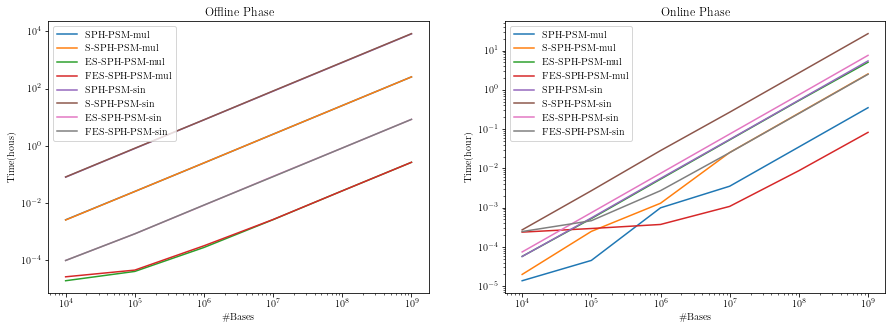

In [45]:
figure, axes = plt.subplots(1, 2, figsize=(15,5))
df1 = pd.DataFrame({sch[0]:P1_mul_Offline, sch[1]:P2_mul_Offline, sch[2]:P3_mul_Offline, sch[3]:P4_mul_Offline, sch[4]:P1_sin_Offline, sch[5]:P2_sin_Offline, sch[6]:P3_sin_Offline, sch[7]:P4_sin_Offline},numOfWholeGenes)
df2 = pd.DataFrame({sch[0]:P1_mul_Online, sch[1]:P2_mul_Online, sch[2]:P3_mul_Online, sch[3]:P4_mul_Online, sch[4]:P1_sin_Online, sch[5]:P2_sin_Online, sch[6]:P3_sin_Online, sch[7]:P4_sin_Online},numOfWholeGenes)

df1.plot(ax=axes[0], loglog=True, xlabel='\#Bases', ylabel='Time(hous)', title='Offline Phase')
df2.plot(ax=axes[1], loglog=True, xlabel='\#Bases', ylabel='Time(hour)', title='Online Phase')

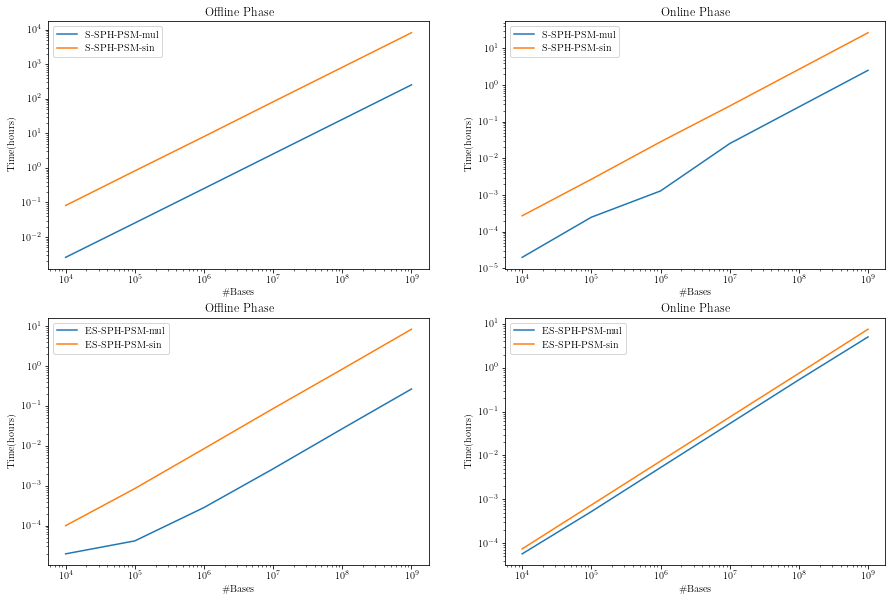

In [59]:
# figure, axes = plt.subplots(4, 2, figsize=(15,20))

df1 = pd.DataFrame({sch[0]:P1_mul_Offline, sch[4]:P1_sin_Offline},numOfWholeGenes)
df2 = pd.DataFrame({sch[0]:P1_mul_Online, sch[4]:P1_sin_Online},numOfWholeGenes)
df3 = pd.DataFrame({sch[1]:P2_mul_Offline, sch[5]:P2_sin_Offline},numOfWholeGenes)
df4 = pd.DataFrame({sch[1]:P2_mul_Online, sch[5]:P2_sin_Online},numOfWholeGenes)
df5 = pd.DataFrame({sch[2]:P3_mul_Offline, sch[6]:P3_sin_Offline},numOfWholeGenes)
df6 = pd.DataFrame({sch[2]:P3_mul_Online, sch[6]:P3_sin_Online},numOfWholeGenes)
df7 = pd.DataFrame({sch[3]:P4_mul_Offline, sch[7]:P4_sin_Offline},numOfWholeGenes)
df8 = pd.DataFrame({sch[3]:P4_mul_Online, sch[7]:P4_sin_Online},numOfWholeGenes)

# df1.plot(ax=axes[0,0], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Offline Phase')
# df2.plot(ax=axes[0,1], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Online Phase')
# df3.plot(ax=axes[1,0], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Offline Phase')
# df4.plot(ax=axes[1,1], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Online Phase')
# df5.plot(ax=axes[2,0], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Offline Phase')
# df6.plot(ax=axes[2,1], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Online Phase')
# df7.plot(ax=axes[3,0], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Offline Phase')
# df8.plot(ax=axes[3,1], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Online Phase')

figure, axes = plt.subplots(2, 2, figsize=(15,10))
df3.plot(ax=axes[0,0], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Offline Phase')
df4.plot(ax=axes[0,1], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Online Phase')
df5.plot(ax=axes[1,0], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Offline Phase')
df6.plot(ax=axes[1,1], loglog=True, xlabel='\#Bases', ylabel='Time(hours)', title='Online Phase')
plt.savefig("fig/eval_com_s_es_mul_sin.pdf")

In [56]:
print("Multi-threading vs Single-threading gain: ")
print(P2_sin_Offline / P2_mul_Offline)
print(P2_sin_Online / P2_mul_Online)

print(P3_sin_Offline / P3_mul_Offline)
print(P3_sin_Online / P3_mul_Online)

Multi-threading vs Single-threading gain: 
[31.71021289 32.22616784 31.89687557 32.28370989 32.28423372 32.28428611]
[13.64250359 10.85886208 21.92474494 10.61827493 10.61613498 10.61592103]
[ 5.09413432 20.52178781 29.88135708 32.35691441 31.15085087 31.53786942]
[1.29784387 1.41291302 1.40450829 1.40771668 1.40591726 1.49780348]


In [ ]:
# bar graph might be better to show..? 